In [71]:
from pyforest import *
from sklearn.preprocessing import KBinsDiscretizer

In [72]:
age_df = pd.DataFrame(np.random.randint(low = 0, high = 72, size = (120, 1)), columns = ['age'])

In [73]:
age_df.head()

,age
0,54
1,51
2,10
3,50
4,28


In [74]:
age_df.describe()

,age
count,120.000000
mean,34.933333
std,20.602983
min,0.000000
25%,17.750000
50%,37.000000
75%,52.000000
max,71.000000


In [75]:
bins = [0, 18, 36, 54, 72]

In [76]:
age_df['range'] = pd.cut(age_df.age, bins)

In [77]:
age_df

,age,range
0,54,"(36.0, 54.0]"
1,51,"(36.0, 54.0]"
2,10,"(0.0, 18.0]"
3,50,"(36.0, 54.0]"
4,28,"(18.0, 36.0]"
...,...,...
115,55,"(54.0, 72.0]"
116,0,NaN
117,40,"(36.0, 54.0]"
118,1,"(0.0, 18.0]"


In [78]:
age_df.range.value_counts()

(36, 54]    41
(0, 18]     31
(18, 36]    25
(54, 72]    21
Name: range, dtype: int64

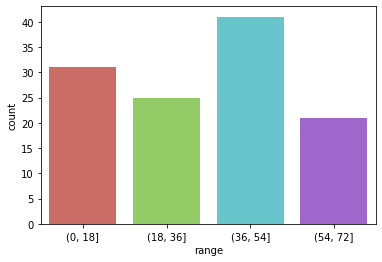

In [79]:
sns.countplot(x = 'range',
             data = age_df,
             palette = 'hls')

In [80]:
discritizer = KBinsDiscretizer(encode = 'ordinal', n_bins=5, strategy='uniform')

In [81]:
age_bins_array = discritizer.fit_transform(age_df[['age']])

In [82]:
age_bins_df = pd.DataFrame(data  = age_bins_array, columns = ['AgesBinned'])

In [83]:
age_bins_df

,AgesBinned
0,3.0
1,3.0
2,0.0
3,3.0
4,1.0
...,...
115,3.0
116,0.0
117,2.0
118,0.0


In [84]:
discritizer.bin_edges_

array([array([ 0. , 14.2, 28.4, 42.6, 56.8, 71. ])], dtype=object)

In [85]:
age_df = pd.concat([age_df, age_bins_df], axis = 1)

In [86]:
# age_df

In [87]:
age_df['Comment'] = ''
age_df.head()

,age,range,AgesBinned,Comment
0,54,"(36, 54]",3.0,
1,51,"(36, 54]",3.0,
2,10,"(0, 18]",0.0,
3,50,"(36, 54]",3.0,
4,28,"(18, 36]",1.0,


In [88]:
age_df.loc[age_df.AgesBinned > 2, 'Comment'] = 'Old'

In [89]:
age_df.loc[age_df.AgesBinned <= 2, 'Comment'] = 'Young'

In [90]:
age_df.sample(5)

,age,range,AgesBinned,Comment
18,17,"(0, 18]",1.0,Young
55,4,"(0, 18]",0.0,Young
14,42,"(36, 54]",2.0,Young
76,19,"(18, 36]",1.0,Young
92,41,"(36, 54]",2.0,Young


In [91]:
age_df.Comment.value_counts()

Young    70
Old      50
Name: Comment, dtype: int64

In [ ]:
plt.scatter()